Modelos y aprendizaje

Examen

Lesly Hidalgo

PLANTEAMIENTO

Supongamos que usted trabaja en el servicio de salud y recibe muestras que provienen de
mujeres con cáncer de mama.

Los médicos han extraído características y las han anotado, su trabajo es crear un modelo
que sea capaz de identificar si un paciente tiene o no cáncer.

Recordemos que un falso positivo no es tan preocupante como un falso negativo, ya que en
el futuro se le hacen más pruebas a las pacientes y hay oportunidades de descubrir que
estábamos en un error.

Sin embargo, un falso negativo puede llevar a que el cáncer se desarrolle sin supervisión
durante más tiempo del necesario y podría llevar a daños más graves o incluso la muerte de
la paciente.

Teniendo esto en cuenta, desarrolla un modelo que funcione lo mejor posible y explica qué
decisiones has tomado en su elaboración y por que.

DESARROLLO

In [325]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [326]:
# Cargar el data set de Cancer de mama para ser analizado con 3 modelos
# https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
cancer_df = pd.read_csv("//Mac/Home/Documents/mis docs/Maestría UIDE/003_Modelos y aprendizaje/examen/data.csv")
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [327]:
# Visualizar la cantidad de variables del data set cargado
cancer_df.shape

(569, 33)

Se puede observar que el dataset tiene 569 filas y 33 columnas

In [330]:
# Visualizar el nombre de las columnas que contiene el data set (se hace esta revisión por que al final del dataset importado aparece una columna Unnamed que en el archivo csv no está)
cancer_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [329]:
# Eliminar última columna Unnamed y volver a ejecutar código anterior para visualizar el dataset
cancer_df.drop(columns=['Unnamed: 32'], inplace=True)

In [331]:
# Información general de los datos que están en el dataset
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [332]:
# Visualizar cuantos valores existen para el tipo de cáncer detectado como maligno y benigno
cancer_df.diagnosis.value_counts()
print("Total diagnosticados: ", str(cancer_df.shape[0]), ", de los cuales", cancer_df.diagnosis.value_counts()['B'], "son Benignos y", cancer_df.diagnosis.value_counts()['M'], "son Malignos")

Total diagnosticados:  569 , de los cuales 357 son Benignos y 212 son Malignos


C:\Users\lesly\AppData\Local\Temp\ipykernel_6788\2042588623.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="diagnosis", data=cancer_df, palette='deep')


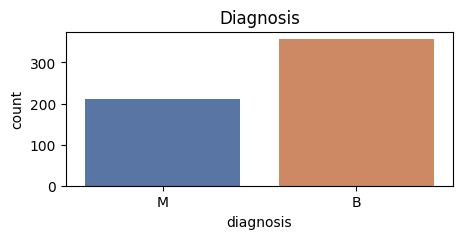

In [333]:
# Graficar los resultados, donde 0 = Benigno y 1 = Malgino
plt.figure(figsize=(5,2))
sns.countplot(x="diagnosis", data=cancer_df, palette='deep')
plt.title("Diagnosis")
plt.show()

Aplicación de PCA para reducir la cantidad de variables del conjunto de datos conservando la mayor cantidad de información para empezar a entrenar los datos con los modelos

In [334]:
# Para aplicar PCA arroja un error que se debe converit en float los datos del data set que entran en conflicto
le = LabelEncoder()
cancer_df['diagnosis'] = le.fit_transform(cancer_df['diagnosis'])

In [335]:
# Estandarizar los datos
scaler = StandardScaler()
scaler.fit(cancer_df)
estandar_cancer_df = scaler.transform(cancer_df)

In [336]:
# Aplicación del PCA
pca = PCA(n_components=2)
pca.fit(estandar_cancer_df)
x_pca = pca.transform(estandar_cancer_df)

In [337]:
# Resultado de aplicar el PCA
estandar_cancer_df.shape, x_pca.shape

((569, 32), (569, 2))

Antes del aplicar el PCA se tenía un data set con 569 filas y 32 columnas, ahora tenemos 569 filas y 2 columnas

In [338]:
# Ver el nuevo DF del data set de Cancer de mama
pca_cancer_df = pd.DataFrame(data=x_pca, columns=['Componente Principal 1', 'Componente Principal 2'])
pca_cancer_df

,Componente Principal 1,Componente Principal 2
0,9.216724,2.136750
1,2.651244,-3.770741
2,5.900697,-1.010916
3,7.137376,10.315636
4,4.139263,-1.916891
...,...,...
564,6.589934,-3.444874
565,4.020812,-3.546088
566,1.525754,-1.950552
567,10.395832,1.871229


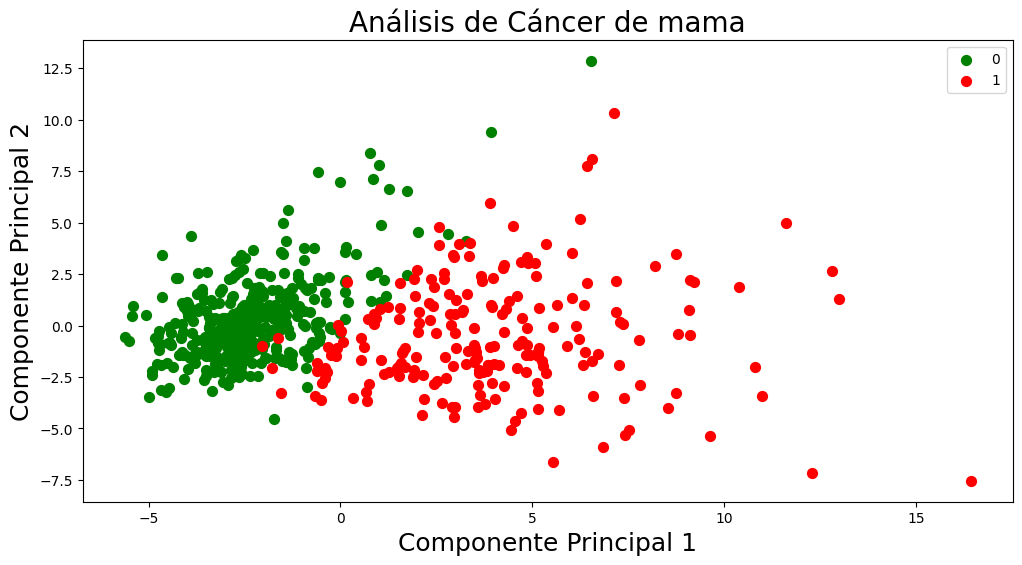

In [339]:
# Graficando el nuevo DF luego de aplicar el PCA
plt.figure(figsize=(12,6))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel('Componente Principal 1', fontsize=18)
plt.ylabel('Componente Principal 2', fontsize=18)
plt.title('Análisis de Cáncer de mama', fontsize=20)
targets = [0, 1] #0 = Benigno y 1 = Malgino
colors = ['g','r'] #g = green (Benigno) y 1 = red (Malgino)
for target, color in zip(targets,colors):
    indicesToKeep = cancer_df['diagnosis'] == target
    plt.scatter(pca_cancer_df.loc[indicesToKeep,'Componente Principal 1'],pca_cancer_df.loc[indicesToKeep,'Componente Principal 2'], c = color, s = 50)
plt.legend(targets,prop = {'size':10})    


Gráfico de dispersión para visualizar los datos transformados después de aplicar PCA, con los puntos coloreados según la etiqueta de diagnóstico (Benigno o Maligno).

In [340]:
# División de los datos
X = cancer_df.drop('diagnosis', axis = 1)
y = cancer_df['diagnosis']

In [341]:
# División del DF en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print("Datos de entrenamiento: ", X_train.shape)
print("Datos de test: ",X_test.shape)

Datos de entrenamiento:  (455, 31)
Datos de test:  (114, 31)


In [342]:
# Crear los datos para entrenamiento
y_train_true = y_train

In [343]:
# Estandarizar los datos de entrenamiento y test
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

Primer modelo: REGRESIÓN LOGÍSTICA

In [344]:
RL = LogisticRegression()

# Entrenar al modelo de datos
RL.fit(X_train,y_train)

LogisticRegression()

In [345]:
# Predicciones para los datos de entrenamiento y de prueba
Y_pred_RL_test = RL.predict(X_test)
Y_pred_RL_train = RL.predict(X_train)

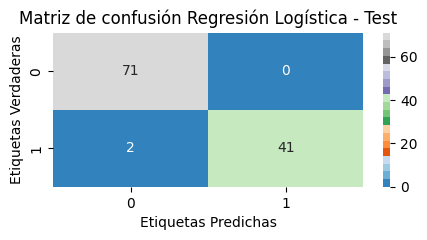

In [346]:
# Matriz de confusión en TEST
matriz_confusion_RL_test = confusion_matrix(y_test,Y_pred_RL_test)
plt.figure(figsize=(5,2))
plt.title("Matriz de confusión Regresión Logística - Test")
sns.heatmap(matriz_confusion_RL_test, annot=True, cmap='tab20c')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.show()

In [347]:
# Precisión del modelo en Test
# Reporte
print(classification_report(y_test,Y_pred_RL_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [348]:
# Puntuación de precisión del modelo en Test
precisionRL = accuracy_score(y_test, Y_pred_RL_test)
precisionRLr = round(precisionRL,2)
print("Precisión del Modelo de Regresión Logística - Test: ", precisionRLr)

Precisión del Modelo de Regresión Logística - Test:  0.98


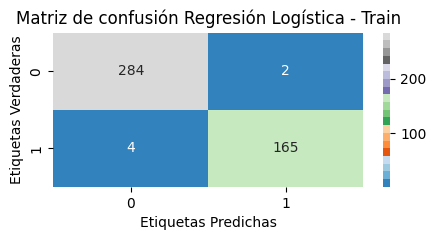

In [349]:
# Matriz de confusión en TRAIN
matriz_confusion_RL_train = confusion_matrix(y_train_true, Y_pred_RL_train)
plt.figure(figsize=(5, 2))
plt.title('Matriz de confusión Regresión Logística - Train')
sns.heatmap(matriz_confusion_RL_train, annot=True, cmap='tab20c', fmt='g')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.show()

In [350]:
# Precisión del modelo en Train
# Reporte
print(classification_report(y_train_true,Y_pred_RL_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       286
           1       0.99      0.98      0.98       169

    accuracy                           0.99       455
   macro avg       0.99      0.98      0.99       455
weighted avg       0.99      0.99      0.99       455



In [351]:
# Puntuación de precisión del modelo en Train
precisionRLt = accuracy_score(y_train_true, Y_pred_RL_train)
precisionRLrt = round(precisionRLt,2)
print("Precisión del Modelo de Regresión Logística - Train: ", precisionRLrt)

Precisión del Modelo de Regresión Logística - Train:  0.99


Segundo modelo: KNN

In [352]:
# Buscar los mejores KNN vecinos
for i in range(1,15):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(X_train,y_train)

In [353]:
# Entrenamiento del modelo 
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [354]:
# Predicciones para los datos de entrenamiento y de prueba
Y_pred_knn_test = model_knn.predict(X_test)
Y_pred_knn_train = model_knn.predict(X_train)

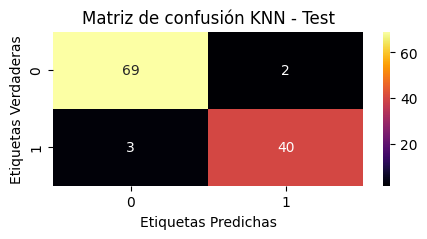

In [355]:
# Matriz de confusión en Test
matriz_confusion_KNN_test = confusion_matrix(y_test,Y_pred_knn_test)
plt.figure(figsize=(5,2))
plt.title("Matriz de confusión KNN - Test")
sns.heatmap(matriz_confusion_KNN_test, annot=True, cmap='inferno')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.show()

In [356]:
# Precisión del modelo en Test
# Reporte
print(classification_report(y_test,Y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [357]:
# Puntuación de precisión del modelo en Test
precisionKNN = accuracy_score(y_test, Y_pred_knn_test)
precisionKNNr = round(precisionKNN,2)
print("Precisión del Modelo KNN - Test: ", precisionKNNr)

Precisión del Modelo KNN - Test:  0.96


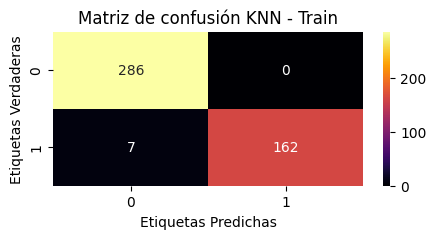

In [358]:
# Matriz de confusión en Train
matriz_confusion_KNN_train = confusion_matrix(y_train_true, Y_pred_knn_train)
plt.figure(figsize=(5,2))
plt.title("Matriz de confusión KNN - Train")
sns.heatmap(matriz_confusion_KNN_train, annot=True, cmap='inferno', fmt='g')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.show()

In [359]:
# Precisión del modelo en Train
# Reporte
print(classification_report(y_train_true,Y_pred_knn_train))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       286
           1       1.00      0.96      0.98       169

    accuracy                           0.98       455
   macro avg       0.99      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



In [360]:
# Puntuación de precisión del modelo en Train
precisionKNNt = accuracy_score(y_train_true, Y_pred_knn_train)
precisionKNNrt = round(precisionKNNt,2)
print("Precisión del Modelo KNN - Train: ", precisionKNNrt)

Precisión del Modelo KNN - Train:  0.98


Tercer modelo: RANDOM FOREST

In [361]:
# Usar la entropía como criterio en el árbol de decisión para intentar minimizar la incertidumbre en cada 
# división del árbol, para conseguir árboles más equilibrados y prevenir el sobreajuste
randomF = RandomForestClassifier(criterion='entropy')

# Entrenar al modelo de datos
randomF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [362]:
# Predicciones para los datos de entrenamiento y de prueba
Y_pred_RF_test = randomF.predict(X_test)
Y_pred_RF_train = randomF.predict(X_train)

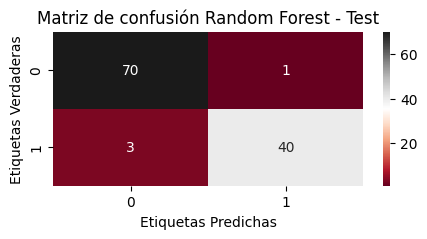

In [363]:
# Matriz de confusión en Test
matriz_confusion_RF_test = confusion_matrix(y_test,Y_pred_RF_test)
plt.figure(figsize=(5,2))
plt.title("Matriz de confusión Random Forest - Test")
sns.heatmap(matriz_confusion_RF_test,annot=True,cmap='RdGy')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.show()

In [364]:
# Precisión del modelo en Test
# Reporte
print(classification_report(y_test,Y_pred_RF_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [365]:
# Puntuación de precisión del modelo en Test
precisionRF = accuracy_score(y_test, Y_pred_RF_test)
precisionRFr = round(precisionRF,2)
print("Precisión del Modelo KNN - Test: ", precisionRFr)

Precisión del Modelo KNN - Test:  0.96


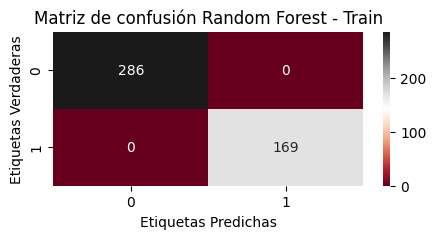

In [366]:
# Matriz de confusión en Train
matriz_confusion_RF_train = confusion_matrix(y_train_true, Y_pred_RF_train)
plt.figure(figsize=(5,2))
plt.title("Matriz de confusión Random Forest - Train")
sns.heatmap(matriz_confusion_RF_train, annot=True, cmap='RdGy', fmt='g')
plt.xlabel('Etiquetas Predichas')
plt.ylabel('Etiquetas Verdaderas')
plt.show()

In [367]:
# Precisión del modelo en Train
# Reporte
print(classification_report(y_train_true,Y_pred_RF_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       286
           1       1.00      1.00      1.00       169

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



In [368]:
# Puntuación de precisión del modelo en Train
precisionRFt = accuracy_score(y_train_true, Y_pred_RF_train)
precisionRFrt = round(precisionRFt,2)
print("Precisión del Modelo KNN - Train: ", precisionRFrt)

Precisión del Modelo KNN - Train:  1.0


CONCLUSIONES

Para el desarrollo del ejercicio planteado se escogieron 3 modelos de aprendizaje:

- Regresión Logística
- KNN
- Random Forest

REGRESIÓN LOGÍSTICA

Regresión logística al ser un modelo de aprendizaje supervisado utilizado para la clasificación binaria, predeciendo la probabilidad de que una observación pertenezca a una de dos clases distintas, en lugar de predecir valores continuos como en la regresión lineal, la regresión logística se utiliza para problemas de clasificación.

Por ende en el contexto de la detección de cáncer, esto es útil para entender el riesgo de que un paciente tenga o no cáncer. Además que el modelo proporciona resultados en términos de probabilidades, permitiendo evaluar el riesgo asociado con cada predicción.

Otra caracteristica es que la regresión logística puede regularizarse para evitar el sobreajuste, siendo útil cuando se trabaja con conjuntos de datos grandes o complejos, donde podría haber muchas características, algunas de las cuales pueden no ser relevantes para la predicción.


KNN

KNN (K-Nearest Neighbors / Vecino más cercano), al ser un modelo de aprendizaje supervisado es utilizado para clasificación y regresión. Es uno de los algoritmos más simples y fácil de entender en el campo del aprendizaje automático.

El hiperparámetro k en KNN controla la cantidad de vecinos considerados para la predicción. Esto permite ajustar la sensibilidad del modelo, con valores bajos de k que pueden capturar patrones locales más detallados y valores altos que pueden suavizar el modelo.

Por lo que, para el analisis del data set de cancer de mama, ofrece una alternativa simple y efectiva, especialmente cuando se valora la simplicidad, la no linealidad y la interpretación sencilla de las predicciones, tomando en cuenta que se puede analizar resultados dependiendo de la variable k que se puede encontrar en cada predicción y poder hacer una comparativa con los resultados de la implementación con los otros modelos.

RANDOM FOREST

Random Forest al ser un modelo de aprendizaje automático que se utiliza tanto para problemas de clasificación como de regresión. Es una técnica de ensamblado que combina múltiples árboles de decisión entrenados en diferentes subconjuntos aleatorios del conjunto de datos de entrenamiento.

Es por esto que se considero para el análisis del data set de cáncer de mama ya que combina múltiples árboles de decisión para capturar relaciones complejas, lo que suele resultar en una alta precisión en la predicción, tomando en cuenta la naturaleza de los datos del data set y lo importante que resulta reducir los falsos negativos.

RESULTADOS - MATRICES DE CONFUSIÓN (TEST Y TRAIN)

In [369]:
print("Regresión Logística Test: \n",matriz_confusion_RL_test)
print("Benignos que son Malignos: 2")
print("Benignos que son Benignos: 71")
print("Malignos que son Malignos: 41")
print("Malignos que son Benignos: 0")
print("\n")
print("Regresión Logística Train: \n",matriz_confusion_RL_train)
print("Benignos que son Malignos: 4")
print("Benignos que son Benignos: 284")
print("Malignos que son Malignos: 165")
print("Malignos que son Benignos: 2")

Regresión Logística Test: 
 [[71  0]
 [ 2 41]]
Benignos que son Malignos: 2
Benignos que son Benignos: 71
Malignos que son Malignos: 41
Malignos que son Benignos: 0


Regresión Logística Train: 
 [[284   2]
 [  4 165]]
Benignos que son Malignos: 4
Benignos que son Benignos: 284
Malignos que son Malignos: 165
Malignos que son Benignos: 2


In [370]:
print("KNN Test: \n",matriz_confusion_KNN_test)
print("Benignos que son Malignos: 3")
print("Benignos que son Benignos: 69")
print("Malignos que son Malignos: 40")
print("Malignos que son Benignos: 2")
print("\n")
print("KNN Train: \n",matriz_confusion_KNN_train)
print("Benignos que son Malignos: 3")
print("Benignos que son Benignos: 69")
print("Malignos que son Malignos: 40")
print("Malignos que son Benignos: 2")

KNN Test: 
 [[69  2]
 [ 3 40]]
Benignos que son Malignos: 3
Benignos que son Benignos: 69
Malignos que son Malignos: 40
Malignos que son Benignos: 2


KNN Train: 
 [[286   0]
 [  7 162]]
Benignos que son Malignos: 3
Benignos que son Benignos: 69
Malignos que son Malignos: 40
Malignos que son Benignos: 2


In [371]:
print("Random Forest Test: \n",matriz_confusion_RF_test)
print("Benignos que son Malignos: 3")
print("Benignos que son Benignos: 70")
print("Malignos que son Malignos: 40")
print("Malignos que son Benignos: 1")
print("\n")
print("Random Forest Train: \n",matriz_confusion_RF_train)
print("Benignos que son Malignos: 0")
print("Benignos que son Benignos: 286")
print("Malignos que son Malignos: 169")
print("Malignos que son Benignos: 0")

Random Forest Test: 
 [[70  1]
 [ 3 40]]
Benignos que son Malignos: 3
Benignos que son Benignos: 70
Malignos que son Malignos: 40
Malignos que son Benignos: 1


Random Forest Train: 
 [[286   0]
 [  0 169]]
Benignos que son Malignos: 0
Benignos que son Benignos: 286
Malignos que son Malignos: 169
Malignos que son Benignos: 0


RESULTADOS - PREDICCIONES (TEST Y TRAIN)

In [372]:
print("RESULTADOS - PREDICCIONES (TEST Y TRAIN)\n")
print("Regresión Logística Test: ", precisionRL)
print("Regresión Logística Train: ", precisionRLt)
print("\n")
print("KNN Test: ", precisionKNN)
print("KNN Train: ", precisionKNNt)
print("\n")
print("Random Forest Test: ", precisionRF)
print("Random Forest Train: ", precisionRFt)

RESULTADOS - PREDICCIONES (TEST Y TRAIN)

Regresión Logística Test:  0.9824561403508771
Regresión Logística Train:  0.9868131868131869


KNN Test:  0.956140350877193
KNN Train:  0.9846153846153847


Random Forest Test:  0.9649122807017544
Random Forest Train:  1.0


INTERPRETACIÓN DE LOS RESULTADOS DE LOS MODELOS DE APRENDIZAJE 

Muestra= Datos en Test: 455 / Datos en Train: 114

La escala de las mejores predicciones de los 3 modelos considerados para el análisis del data set de Cáncer de mama en Test y Train son:

1)  Random Forest en Train con una predicción de 100%
    
    Del total de 114 datos, no tuvo errores en las predicciones

2) Regresión Logística en Train con una predicción del 98.6%

   Del total de 114 datos, tuvo error en las predicciones de 4 Benignos que en realidad son Malignos y 2 Malignos que en realidad son Benignos
   
3) KNN en Train con una predicción de 98.4%

   Del total de 114 datos, tuvo error en las predicciones de 3 Benignos que en realidad son Malignos y 2 Malignos que en realidad son Benignos

4) Regresión Logística en Test con una predicción del 98.2%

   Del total de 455 datos, tuvo error en las predicciones de 2 Benignos que en realidad son Malignos

5) Random Forest en Test con una predicción del 96.4%   

   Del total de 455 datos, tuvo error en las predicciones de 3 Benignos que en realidad son Malignos y 1 Maligno que en realidad es Benigno

6) KNN en Test con una predicción de 95.6%

   Del total de 455 datos, tuvo error en las predicciones de 3 Benignos que en realidad son Malignos y 2 Malignos que en realidad son Benignos

Siendo que lo más riesgoso en las predicciones de un modelo de datos médicos, como en este caso Cáncer de mama, el mejor modelo para implementar y seguir entrenando es RANDOM FOREST.